In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:10<00:00, 147MB/s]
100% 1.06G/1.06G [00:10<00:00, 108MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('./content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [12]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/content/train',
    labels='inferred',
    label_mode = 'int', # Change 'labels_mode' to 'label_mode'
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/content/test',
    labels='inferred',
    label_mode = 'int', # Change 'labels_mode' to 'label_mode'
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
#normalize
def process(image,label):
  image = tf.cast(image/255 ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
#creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 110ms/step - loss: 1.1505 - accuracy: 0.6190 - val_loss: 0.5907 - val_accuracy: 0.6778
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5620 - accuracy: 0.7125 - val_loss: 0.5428 - val_accuracy: 0.7232
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4897 - accuracy: 0.7647 - val_loss: 0.4998 - val_accuracy: 0.7616
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4235 - accuracy: 0.8051 - val_loss: 0.4913 - val_accuracy: 0.7910
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3630 - accuracy: 0.8345 - val_loss: 0.6377 - val_accuracy: 0.7466
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3004 - accuracy: 0.8689 - val_loss: 0.4688 - val_accuracy: 0.8178
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2097 - accuracy: 0.9138 - val_loss: 0.5606 - val_ac

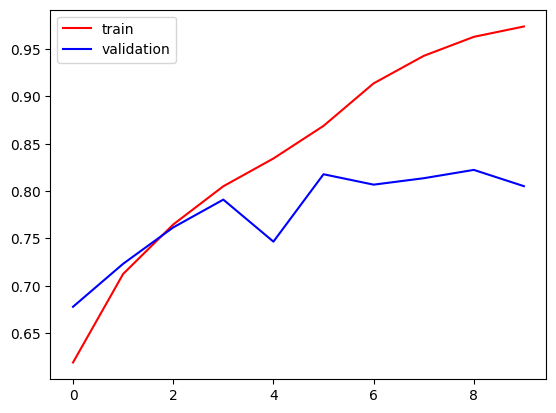

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

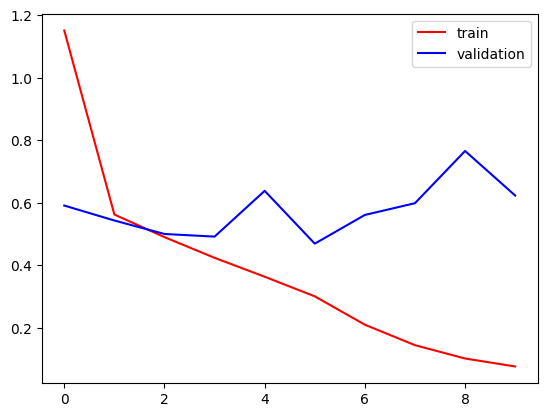

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#need to reduce complexity

#add more data
#reducing complexity

In [20]:
import cv2

In [21]:
test_image = cv2.imread('/content/cat.jpg')

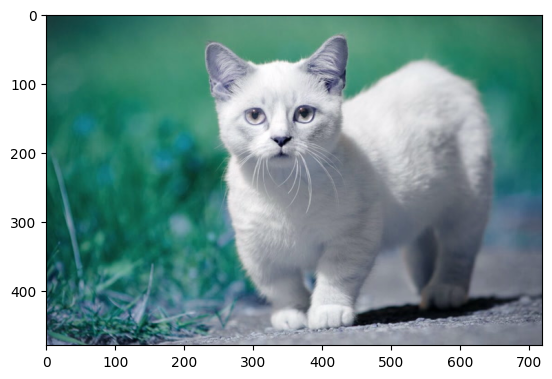

In [22]:
plt.imshow(test_image)

In [23]:
test_image.shape

(480, 720, 3)

In [24]:
test_image = cv2.resize(test_image,(256,256))

In [25]:
test_input = test_image.reshape(1,256,256,3)

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 391ms/step


array([[0.9999988]], dtype=float32)

In [27]:
test_image = cv2.imread('/content/dog.jpg')

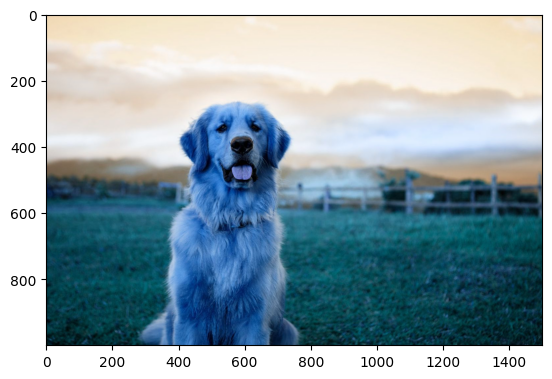

In [28]:
plt.imshow(test_image)

In [29]:
test_image.shape

(1000, 1500, 3)

In [30]:
test_image = cv2.resize(test_image,(256,256))

In [31]:
test_input = test_image.reshape(1,256,256,3)

In [32]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)